In [1]:
import sys 
sys.path.append('/home/jovyan/work/STA-663-Final-Project/SGHMC')
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import autograd.numpy as np
from autograd import jacobian
import pystan 
from sghmc.SGHMC_algorithm import sghmc,sghmc_cleaned
import pandas as pd
import tensorflow as tf
from scipy import linalg as la

In [2]:
data_demo=pd.read_csv("rep_demo.csv")

In [3]:
data_demo.head()

,ISIN,name,sectors,No_reported_risk_exposure,Impacts_on_communities,Impacts_on_landscapes_ecosystems_and_biodiversity,Violation_of_international_standards,Local_pollution,Climate_change_GHG_emissions_and_global_pollution,Other_environmental_issues,...,Poor_employmen_conditions,Misleading_communication,Freedom_of_association_and_collective_bargaining,Forced_labor,Child_labor,Discrimination_in_employment,Fraud,Tax_evasion,Anti_competitive_practices,Tax_optimization
0,US02376R1023,American Airlines Group Inc,Airlines,False,15.0,3.0,1.0,0.0,8.0,0.0,...,17.0,2.0,10.0,0.0,0.0,7.0,6.0,1.0,27.0,0.0
1,US0378331005,Apple Inc (Apple),Technology Hardware and Equipment,False,71.0,77.0,16.0,72.0,17.0,1.0,...,315.0,47.0,37.0,89.0,132.0,32.0,90.0,66.0,234.0,157.0
2,US0394831020,Archer Daniels Midland Co (ADM),Food and Beverage,False,64.0,79.0,5.0,33.0,34.0,0.0,...,16.0,15.0,1.0,28.0,30.0,4.0,8.0,1.0,16.0,2.0
3,US02005N1000,Ally Financial Inc (formerly GMAC Inc),Financial Services,False,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,20.0,0.0,1.0,0.0
4,US02043Q1076,Alnylam Pharmaceuticals Inc,Pharmaceuticals and Biotechnology,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
## get the data for the number of new in array and sum
train=data_demo.drop(["ISIN","name","sectors","No_reported_risk_exposure"], axis=1).values.sum(axis=1)

In [40]:
theta_0=np.array([train.mean()])

In [6]:
variance=train.var()
variance

723630.4570759623

In [13]:
data=pd.read_csv("rep.csv")

In [8]:
truth=data.drop(["RepRisk_ID","name","sectors","primary_ISIN","No_reported_risk_exposure","all_ISINs"], axis=1).values.sum(axis=1).reshape(-1,1)

In [27]:
truth.var()

35712.3597083323

In [48]:
def log_like(y,mu):
    '''compute grad log pdf'''
    return np.sum(abs(y-mu))

def log_prior(mu):
    '''compute grad log prior'''
    return -mu/35712
    
def gradU(theta, x, n, batch_size):
    return -(n*log_like(x,theta)/batch_size+log_prior(theta))

In [70]:
np.random.seed(1111)
# Set up the data
p = 1 #dimension of theta
theta = theta_0
n = 10000


    
## Initialize parameters and sample 
    
# Initialize mean parameters
#theta_0 = np.random.normal(size=(p,1))
theta_0 = theta # initialize at "true" value for testing
    
# Initialize tuning parameters:
# learning rate
eta = 0.01/n * np.eye(p)
# Friction rate
alpha = 0.1 * np.eye(p)
    
# Arbitrary guess at covariance of noise from mini-batching the data
V = np.eye(p)*truth.var()
niter = 50
batch_size=1000
    
# Run sampling algorithm
samps = sghmc(gradU, eta, niter, alpha, theta_0, V, truth, batch_size)


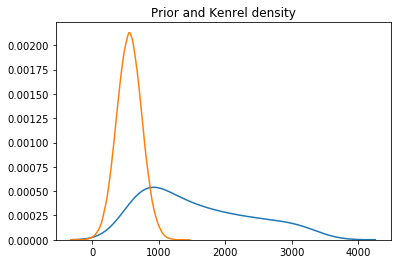

In [74]:
sns.kdeplot(samps.reshape(-1))
sns.kdeplot(x)
plt.title("Prior and Kenrel density")
plt.savefig("Appli_2.png")

In [72]:
x=np.random.normal(theta_0,np.sqrt(truth.var()),100000)




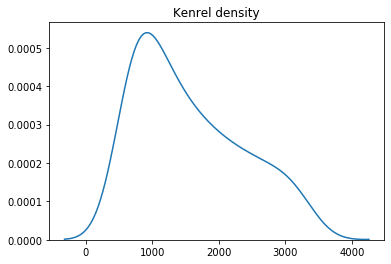

In [73]:
sns.kdeplot(samps.reshape(-1))
plt.title("Kenrel density")
plt.savefig("Appli_1.png")